<a href="https://colab.research.google.com/github/Aayush121202/Reinforcement_Learning/blob/main/Taxi_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym

In [2]:
def eps_greedy(Q, s, eps=0.1):
    '''
    Epsilon greedy policy
    '''
    if np.random.uniform(0,1) < eps:
        # Choose a random action
        return np.random.randint(Q.shape[1])
    else:
        # Choose the action of a greedy policy
        return greedy(Q, s)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def greedy(Q, s):
    '''
    Greedy policy

    return the index corresponding to the maximum action-state value
    '''
    return np.argmax(Q[s])

In [4]:
def run_episodes(env, Q, num_episodes=100, to_print=False):
    '''
    Run some episodes to test the policy
    '''
    tot_rew = []
    state = env.reset()

    for _ in range(num_episodes):
        done = False
        game_rew = 0

        while not done:
            # select a greedy action
            next_state, rew, done, _ = env.step(greedy(Q, state))

            state = next_state
            game_rew += rew
            if done:
                state = env.reset()
                tot_rew.append(game_rew)

    if to_print:
        print('Mean score: %.3f of %i games!'%(np.mean(tot_rew), num_episodes))

    return np.mean(tot_rew)

In [5]:
def Q_learning(env, lr=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    nA = env.action_space.n
    nS = env.observation_space.n

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > 0.01:
            eps -= eps_decay

        # loop the main body until the environment stops
        while not done:
            # select an action following the eps-greedy policy
            action = eps_greedy(Q, state, eps)

            next_state, rew, done, _ = env.step(action) # Take one step in the environment

            # Q-learning update the state-action value (get the max Q value for the next state)
            Q[state][action] = Q[state][action] + lr*(rew + gamma*np.max(Q[next_state]) - Q[state][action])

            state = next_state
            tot_rew += rew
            if done:
                games_reward.append(tot_rew)

        # Test the policy every 300 episodes and print the results
        if (ep % 300) == 0:
            test_rew = run_episodes(env, Q, 1000)
            print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
            test_rewards.append(test_rew)

    return Q


In [6]:
def SARSA(env, lr=0.01, num_episodes=10000, eps=0.3, gamma=0.95, eps_decay=0.00005):
    nA = env.action_space.n
    nS = env.observation_space.n

    # Initialize the Q matrix
    # Q: matrix nS*nA where each row represent a state and each colums represent a different action
    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0

        # decay the epsilon value until it reaches the threshold of 0.01
        if eps > 0.01:
            eps -= eps_decay


        action = eps_greedy(Q, state, eps)

        # loop the main body until the environment stops
        while not done:
            next_state, rew, done, _ = env.step(action) # Take one step in the environment

            # choose the next action (needed for the SARSA update)
            next_action = eps_greedy(Q, next_state, eps)
            # SARSA update
            Q[state][action] = Q[state][action] + lr*(rew + gamma*Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action
            tot_rew += rew
            if done:
                games_reward.append(tot_rew)

        # Test the policy every 300 episodes and print the results
        if (ep % 300) == 0:
            test_rew = run_episodes(env, Q, 1000)
            print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
            test_rewards.append(test_rew)

    return Q

In [8]:
if __name__ == '__main__':
    env = gym.make('Taxi-v3')

    Q_qlearning = Q_learning(env, lr=.1, num_episodes=5000, eps=0.4, gamma=0.95, eps_decay=0.001)

    Q_sarsa = SARSA(env, lr=.1, num_episodes=5000, eps=0.4, gamma=0.95, eps_decay=0.001)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:    0  Eps:0.3990  Rew:-234.0920
Episode:  300  Eps:0.0990  Rew:-195.7370
Episode:  600  Eps:0.0100  Rew:-180.7690
Episode:  900  Eps:0.0100  Rew:-145.2980
Episode: 1200  Eps:0.0100  Rew:-114.6730
Episode: 1500  Eps:0.0100  Rew:-94.5260
Episode: 1800  Eps:0.0100  Rew:-40.0640
Episode: 2100  Eps:0.0100  Rew:-20.0250
Episode: 2400  Eps:0.0100  Rew:-10.2060
Episode: 2700  Eps:0.0100  Rew:-16.3890
Episode: 3000  Eps:0.0100  Rew:-14.5210
Episode: 3300  Eps:0.0100  Rew:-0.4270
Episode: 3600  Eps:0.0100  Rew:2.7600
Episode: 3900  Eps:0.0100  Rew:6.1360
Episode: 4200  Eps:0.0100  Rew:6.6390
Episode: 4500  Eps:0.0100  Rew:6.9920
Episode: 4800  Eps:0.0100  Rew:8.0900
Episode:    0  Eps:0.3990  Rew:-246.6560
Episode:  300  Eps:0.0990  Rew:-230.8240
Episode:  600  Eps:0.0100  Rew:-209.2450
Episode:  900  Eps:0.0100  Rew:-209.3160
Episode: 1200  Eps:0.0100  Rew:-139.3920
Episode: 1500  Eps:0.0100  Rew:-130.9110
Episode: 1800  Eps:0.0100  Rew:-26.6860
Episode: 2100  Eps:0.0100  Rew:-14.3180


## PLOT FOR Q-LEARNING

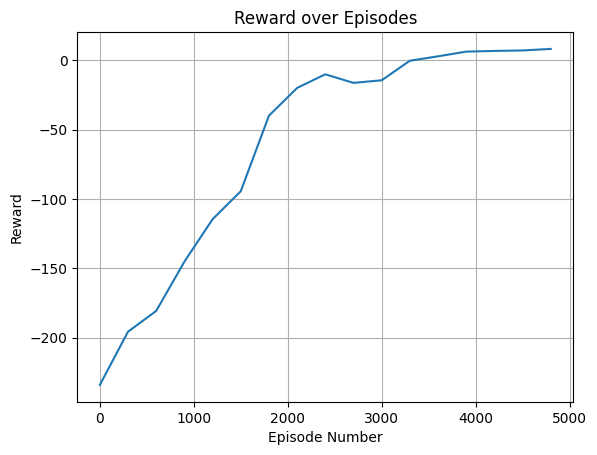

In [9]:
import matplotlib.pyplot as plt

# Sample data
episode_numbers = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800]
rewards = [-234.0920, -195.7370, -180.7690, -145.2980, -114.6730, -94.5260, -40.0640, -20.0250, -10.2060, -16.3890, -14.5210, -0.4270, 2.7600, 6.1360, 6.6390, 6.9920, 8.0900]

# Plotting
plt.plot(episode_numbers, rewards)
plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.title('Reward over Episodes')
plt.grid(True)
plt.show()


## PLOT FOR SARSA

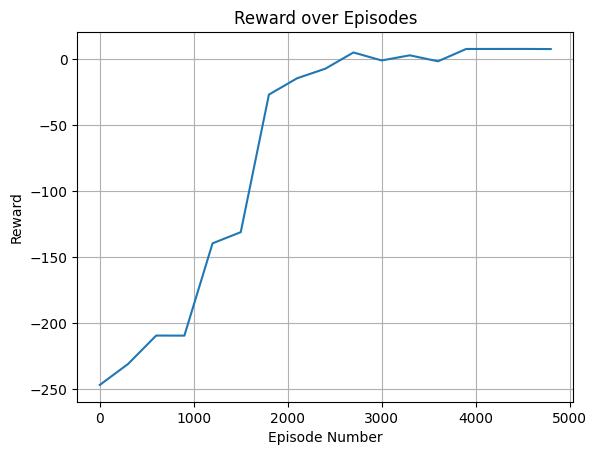

In [10]:
import matplotlib.pyplot as plt

# Sample data
episode_numbers = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800]
rewards = [-246.6560, -230.8240, -209.2450, -209.3160, -139.3920, -130.9110, -26.6860, -14.3180, -7.0820, 5.2280, -0.8060, 3.0730, -1.4540, 7.8830, 7.8940, 7.9170, 7.8130]

# Plotting
plt.plot(episode_numbers, rewards)
plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.title('Reward over Episodes')
plt.grid(True)
plt.show()


## Comparison

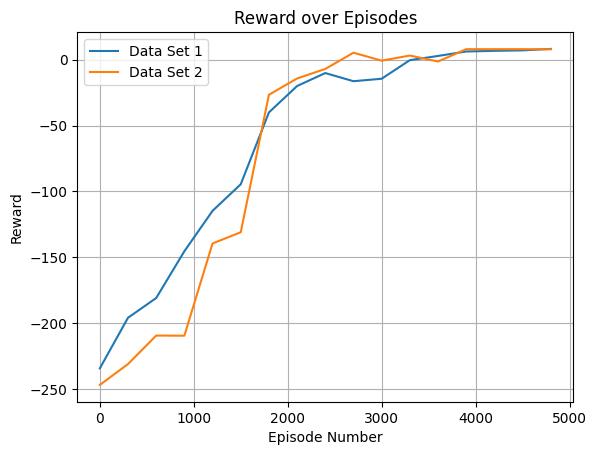

In [11]:
import matplotlib.pyplot as plt

# Sample data for first set
episode_numbers_1 = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800]
rewards_1 = [-234.0920, -195.7370, -180.7690, -145.2980, -114.6730, -94.5260, -40.0640, -20.0250, -10.2060, -16.3890, -14.5210, -0.4270, 2.7600, 6.1360, 6.6390, 6.9920, 8.0900]

# Sample data for second set
episode_numbers_2 = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800]
rewards_2 = [-246.6560, -230.8240, -209.2450, -209.3160, -139.3920, -130.9110, -26.6860, -14.3180, -7.0820, 5.2280, -0.8060, 3.0730, -1.4540, 7.8830, 7.8940, 7.9170, 7.8130]

# Plotting both sets of data
plt.plot(episode_numbers_1, rewards_1, label='Data Set 1')
plt.plot(episode_numbers_2, rewards_2, label='Data Set 2')

plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.title('Reward over Episodes')
plt.grid(True)
plt.legend()
plt.show()
